In [1]:
%matplotlib inline
import fdulib as vdf
import emcee
from py_unsio import *
import numpy as np
from operator import add
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import cfalcon
CF =cfalcon.CFalcon()

In [2]:
path ='/data/OWN/box_25Mpc_zoomed/output_00041'

In [3]:
uns = CunsIn(path,"all","all",False)
ok=uns.nextFrame("")
print uns.isValid()

True


In [4]:

p = vdf.info(path)
          
ok,pos = uns.getArrayF("all","pos")
ok,par_id = uns.getArrayI("all","id")
ok,mass = uns.getArrayF("all","mass")

print len(mass), len(par_id)

4385585 4385585


In [5]:
mass =  np.array(mass * p.simutoMsun,dtype=np.float32)

shift =np.array([.5,.5,.5]*(len(pos)/3))

## center in halo and transform to kpc
pos = np.array((pos-shift)*p.simutokpc,dtype=np.float32)

print np.max(mass), np.min(mass)


4.78136e+08 933860.0


In [6]:
x =pos[0::3]
y =pos[1::3]
z =pos[2::3]
r = np.sqrt((x**2)+(y**2)+(z**2))        

In [7]:
condition = (mass<1e6)
mass_zoom = mass[condition]
x_zoom=x[condition]
y_zoom=y[condition]
z_zoom=z[condition]
r_zoom=r[condition]
id_zoom=par_id[condition]
print len(x_zoom)

1442456


In [8]:
pos2 = np.zeros(3*len(mass_zoom))
pos2[0::3] =x_zoom
pos2[1::3] =y_zoom
pos2[2::3] =z_zoom
pos2 = np.array(pos2,dtype=np.float32)

In [9]:
ok,rho_zoom,_=CF.getDensity(pos2, mass_zoom)

In [10]:
print np.max(rho_zoom)
print len(rho_zoom[(rho_zoom==np.max(rho_zoom))])
center = [x_zoom[(rho_zoom==np.max(rho_zoom))][0],
          y_zoom[(rho_zoom==np.max(rho_zoom))][0],
          z_zoom[(rho_zoom==np.max(rho_zoom))][0]]

print center
x_zoom = x_zoom-center[0]
y_zoom = y_zoom-center[1]
z_zoom = z_zoom-center[2]

3.43858e+08
1
[-1725.0214, -1722.6134, -1296.7261]


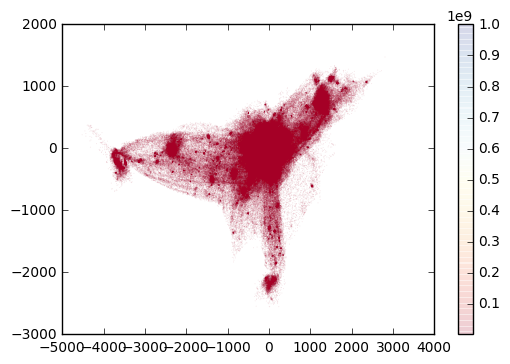

In [11]:
fig,ax=plt.subplots()
cm = plt.cm.get_cmap('RdYlBu')
sc =ax.scatter(x_zoom,y_zoom,c=rho_zoom,vmin=1e6, vmax=1e9,
           alpha=.1,marker='o',s=.5,cmap=cm,lw=0)
plt.colorbar(sc)

In [13]:
print np.min(z_zoom),np.max(z_zoom)

 -1171.1 1239.51


In [14]:
r_zoom=np.sqrt((x_zoom**2)+(y_zoom**2)+(z_zoom**2))

condition = (r_zoom<300.)&(rho_zoom>5e4)
mass_vir = mass_zoom[condition]
x_vir=x_zoom[condition]
y_vir=y_zoom[condition]
z_vir=z_zoom[condition]
id_vir=id_zoom[condition]
rho_vir=rho_zoom[condition]
print len(x_vir)

456042


In [15]:
print len(rho_vir[(rho_vir>1e4)])

456042


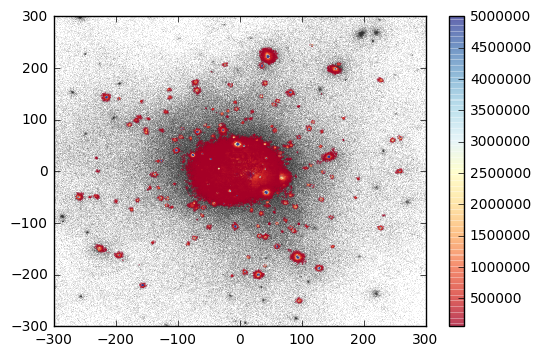

In [16]:
fig,ax=plt.subplots()
cm = plt.cm.get_cmap('RdYlBu')
ax.set_xlim([-300,300])
ax.set_ylim([-300,300])

sc =ax.scatter(x_zoom,y_zoom,c='gray',vmin=1e6, vmax=1e9,
           alpha=.05,marker='o',s=.5,lw=0)
sc =ax.scatter(x_vir,y_vir,c=rho_vir,vmin=5e4, vmax=5e6,
           alpha=.5,marker='o',s=.5,cmap=cm,lw = 0)
plt.colorbar(sc)

In [17]:
r_zoom=np.sqrt((x_zoom**2)+(y_zoom**2)+(z_zoom**2))

condition = (r_zoom<300.)&(rho_zoom>4.8e7)
mass_cen = mass_zoom[condition]
x_cen=x_zoom[condition]
y_cen=y_zoom[condition]
z_cen=z_zoom[condition]
id_cen=id_zoom[condition]
rho_cen=rho_zoom[condition]
print len(x_cen)


4758


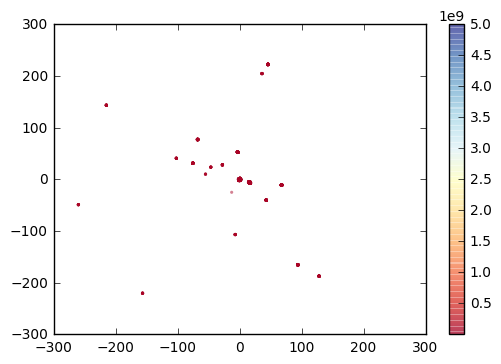

In [18]:
fig,ax=plt.subplots()
cm = plt.cm.get_cmap('RdYlBu')
ax.set_xlim([-300,300])
ax.set_ylim([-300,300])

#sc =ax.scatter(x_zoom,y_zoom,c='gray',vmin=1e6, vmax=1e9,
#           alpha=.05,marker='o',s=.5,lw=0)
sc =ax.scatter(x_cen,y_cen,c=rho_cen,vmin=5e4, vmax=5e9,
           alpha=.5,marker='o',s=5,cmap=cm,lw = 0)
plt.colorbar(sc)